In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [75]:
# Exploring all categories
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

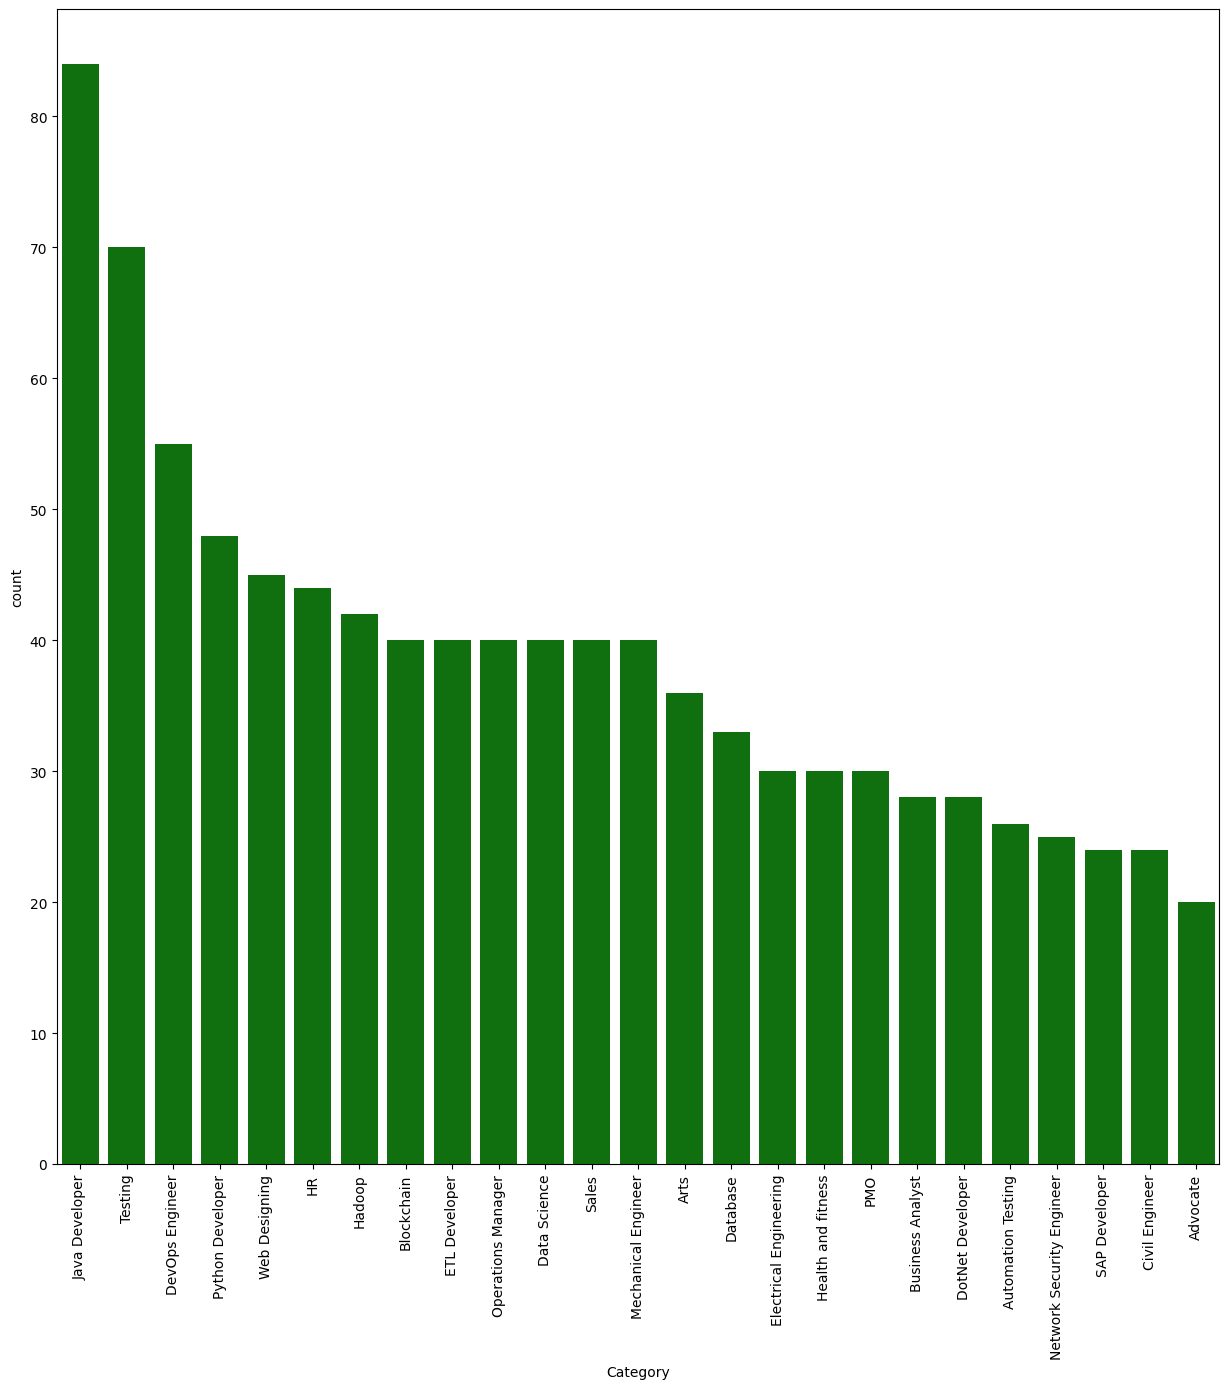

In [76]:
# Visualizing different categories
plt.figure(figsize=(15, 15))
sns.barplot(df['Category'].value_counts(), color='green')
plt.xticks(rotation=90)
plt.show()

## Data Cleaning


In [77]:
import re

def cleanResume(text):
    cleanText = re.sub('http\S+\s', ' ', text)
    cleanText = re.sub('#[^\s]+|@[^\s]+', ' ', cleanText)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


In [78]:
# Cleaning very row 
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))
print(df['Resume'])

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object


## Data Preprocessing

In [79]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [80]:
encoder = LabelEncoder()
df['Category'] = encoder.fit_transform(df['Category'])

In [81]:
tfidf = TfidfVectorizer(stop_words='english')
newText = tfidf.fit_transform(df['Resume'])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(newText, df['Category'], test_size=0.2, random_state=42)

## Training the Model

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [84]:
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [85]:
print(f'Model accuracy: {accuracy_score(y_test, y_pred)}')

Model accuracy: 0.9844559585492227


## Predicting Resume

In [86]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))

In [87]:
myResume = """ZEERAK BABAR
Davis, California, 95616
530-760-9540 | zeerakbabar@gmail.com | linkedin.com/in/zeerak-babar | github.com/zeerakb1 | zeerakb1.github.io
EDUCATION
University of California, Davis Expected: June 2025
Master of Science in Computer Science Davis, California
Lahore University of Management Sciences September 2019 - May 2023
Bachelor of Science in Computer Science Lahore, Pakistan
Relevant Coursework: Object-Oriented Programming, Data Structures, Discrete Math, Algorithms Design and Analysis,
Operating Systems, Network Security, Software Engineering, Data Science, Data Mining, HCI, Artificial Intelligence
TECHNICAL SKILLS
Programming Language: Python, C, C++, JavaScript, Typescript, HTML / CSS, Bash, Latex, Matlab, Haskell, Java, Rust
Frameworks: ReactJS, Nodejs, Express.js, Angular.Js, Flutter, Bootstrap, Pytest
Database: Firebase, SQL / MySQL, SQLite, Postgres, NoSQL, MongoDB
Developer Tools: Git, Github, Docker, Kubernetes, Heroku, Google Cloud, Trello, Postman, Selenium, Figma
EXPERIENCE
Graduate Teaching Assistant | Leadership, Communication Skills, Problem-Solving September 2023 – Present
University of California, Davis Davis, California
• Lead and manage 3 discussion sections with a strength of 50 students, fostering an interactive learning environment
• Design quizzes, facilitate group activities, and grade assignments, ensuring feedback and student improvement
Undergraduate Research Assistant | Bash, Python, Docker, Linux September 2022 – June 2023
Lahore University of Management Sciences Lahore, Pakistan
• Analyzed Linux audit provenance logs to identify Common Vulnerability Exploits within containerized applications,
focusing on detecting Container Escape Attacks
• Automated log processing in SPADE (open source code) through the integration of filter feature and developed
bash/python scripts, leading to significant decrease in irrelevant logs and a 30% reduction in manual processing time
• Utilized Graph Convolutional Network (GCN) and Multilayer perceptron (MLP) as an autoencoder in machine learning
models to identify anomalies in software installations, achieving high detection accuracy for malicious attacks
Software Development Intern | Javascript, Angular, Ionic, Docker June 2022 – September 2022
Techloyce Lahore, Pakistan
• Collaborated with the team working on the B2B product ”SubscriptionFlow,” contributing to more efficient product
functionality and customer transaction process
• Worked with cross-functional teams to build a billing platform, enhancing user interface for increased user engagement
• Improved application speed by implementing Cache storage and optimizing search and filtering features, leading to a
70% reduction in data retrieval time
• Performed testing and code review, incorporated changes, leading to 20% improvement in product reliability
PROJECTS
BriefBox | ReactJs, OpenAI, Tailwind CSS Github Link
• Developed a website called BriefBox that utilizes OpenAI API to provide concise and brief overviews of articles and blogs
• Optimized website’s data retrieval with React Hooks and local storage, reducing load times for previous articles by 35%
Bookshelf | Node, React, Express, MongoDb, Postman, Redux Private Repo
• Built a full-stack MERN application to convert a local bookstore’s inventory into an online e-commerce platform
• Implemented JWT authentication and integrated session storage, enhancing security and user login experiences
• Built REST APIs to relay data from backend to frontend, employed redux for efficient state management, which optimized
interface responsiveness and user experience
BackSpace | Flutter, Dart, Firebase, Figma Github Link
• Developed an end-to-end android application designed to connect the LUMS student community of 1000+ students
• Enhanced data security through real-time Firebase integration, achieving 15% decrease in authentication issues
• Integrated user-friendly UI design through Figma, successfully integrated third-party API, and fine-tuned app performance
to ensure optimal functionality using agile methodologies
TV Shows - Cleaning and Exploration | Python, Scikit-learn, Numpy, Pandas Github Link
• Analyzed TV show data from streaming platforms to identify viewer trends and preferences
• Conducted data cleaning to handle outliers, and performed exploratory data analysis to identify key insights
• Trained a Linear Regression model on the cleansed dataset to predict future show ratings with an accuracy of 93% """

In [94]:
import pickle

# Load the model 
model = pickle.load(open('model.pkl', 'rb'))

# Clean the resume
processedResume = cleanResume(myResume)

# Transform features
features = tfidf.transform([processedResume])

categoryMapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

probabilities = model.predict_proba(features)

# Get top 5 predictions for each instance
top_5_indices = np.argsort(probabilities, axis=1)[:, -5:]

# Map indices to labels
top_5_labels = [[categoryMapping[idx] for idx in indices_row] for indices_row in top_5_indices]

# Since you are predicting for a single instance, get the result for that instance
predicted_categories = top_5_labels[0]

print("Top 5 Predicted Categories:", predicted_categories)


Top 5 Predicted Categories: ['Automation Testing', 'Arts', 'Electrical Engineering', 'Web Designing', 'Data Science']
